# Скачивание и установка данных и библиотек, определение основных функций

In [1]:
# @title Скачиваем архив с данными
import requests
from urllib.parse import urlencode

final_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' + urlencode(dict(public_key='https://disk.yandex.ru/d/aG0zc773fartCw'))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('GEO.zip', 'wb') as f:
    f.write(download_response.content)

In [ ]:
# @title Распасковка данных, импорт библиотек
%pip install geopandas
%pip install rtree
!unzip GEO.zip

import geopandas, rtree, numpy, random, time

In [3]:
# @title Определение основных функций и переменных
mw_buildings = geopandas.read_file(r'./data/building-polygon.shp', encoding = "utf-8")
not_yes_buildings = mw_buildings[mw_buildings['BUILDING'] != 'yes']

def get_building_type(ind):
  found_type = not_yes_buildings.iloc[[ind]]['BUILDING']
  found_type = [i for i in found_type]
  return found_type[0]


def get_building_name(ind):
  found_type = not_yes_buildings.iloc[[ind]]['NAME']
  found_type = [i for i in found_type]
  return found_type[0]

def get_coords(ind):
  try:
    found_building = not_yes_buildings.iloc[[ind]]
    found_building = found_building['geometry']
    g = [i for i in found_building]
    x,y = g[0].exterior.coords.xy
    coords = numpy.dstack((x,y)).tolist()[0]
    western_point, eastern_point = coords[0], coords[-1]
    western_point = [min(western_point[0], eastern_point[0]), min(western_point[1], eastern_point[1])]
    eastern_point = [max(western_point[0], eastern_point[0]), max(western_point[1], eastern_point[1])]
    for i in range(1, len(coords) - 1):
      x, y = coords[i]
      western_point = [min(western_point[0], x), min(western_point[1], y)]
      eastern_point = [max(x, eastern_point[0]), max(y, eastern_point[1])]
    return [western_point, eastern_point]
  except:
    return get_coords_for_multipolygon(ind)

def get_coords_for_multipolygon(ind):
  found_building = not_yes_buildings.iloc[[ind]]
  found_building = found_building.explode()
  found_building = found_building['geometry']
  g = [i for i in found_building]
  x,y = g[0].exterior.coords.xy
  coords = numpy.dstack((x,y)).tolist()[0]
  western_point, eastern_point = coords[0], coords[-1]
  western_point = [min(western_point[0], eastern_point[0]), min(western_point[1], eastern_point[1])]
  eastern_point = [max(western_point[0], eastern_point[0]), max(western_point[1], eastern_point[1])]
  for i in range(1, len(coords) - 1):
    x, y = coords[i]
    western_point = [min(western_point[0], x), min(western_point[1], y)]
    eastern_point = [max(x, eastern_point[0]), max(y, eastern_point[1])]
  return [western_point, eastern_point]

In [4]:
# @title Создание R-tree и заполнение его данным зданий Москвы

mskRtree = rtree.index.Rtree('rtree')

for ind in range(len(not_yes_buildings)):
  if ind % 1000 == 0:
    print(round(ind / len(not_yes_buildings) * 100, 2), '%')
  building_type = get_building_type(ind)
  building_name = get_building_name(ind)
  western_point, eastern_point = get_coords(ind)
  x0, y0 = western_point
  x1, y1 = eastern_point
  mskRtree.insert(id=ind, coordinates=(x0, y0, x1, y1), obj=[building_type, building_name])

0.0 %
3.2 %
6.4 %
9.6 %
12.81 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()
<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


16.01 %
19.21 %
22.41 %
25.61 %
28.81 %
32.02 %
35.22 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()
<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


38.42 %
41.62 %
44.82 %
48.02 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


51.23 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


54.43 %
57.63 %
60.83 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


64.03 %
67.23 %
70.44 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


73.64 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


76.84 %
80.04 %
83.24 %
86.44 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


89.65 %
92.85 %
96.05 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


99.25 %


<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()
<ipython-input-3-ac7863fea694>:36: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  found_building = found_building.explode()


# Домашка📚

# 1. Где Джон Траволта?

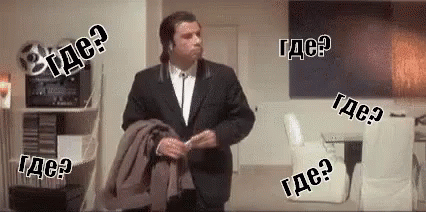

Джон Траволта потерялся. Известны его координаты: 55.795680, 37.489970. Используй данные из R-Tree, чтобы узнать в каком здании он находится!

In [ ]:
y1, x1 = [float(i) for i in input().split(',')]#55.795680, 37.489970

def FindTravolta(x , y):
  lst_buildings = [i.object for i in mskRtree.intersection((x, y, x, y), objects = True)]
  if len(lst_buildings) != 0:
    print(f"Джон Траволта находиться в здании:\n{lst_buildings[0]}")
  else:
    lst_nearest = [i.object for i in mskRtree.nearest((x, y, x, y), objects = True)]
    print(f"Джон Траволта не находиться в здании\nБлижайшее к нему здание:\n{lst_nearest[0]}")

FindTravolta(x1, y1)

# 2. Обнови данные!

В городе постоянно появляется что-то новое. Неоторые данные из нашего R-Tree уже устарели😭 Помоги это исправить! Примерно год назад на Павелецкой площади открылся торговый центр Павелецкая плаза (тип 'mall'). Координаты - 55.730884, 37.638696. Задача - внести данные о нем в R-Tree.

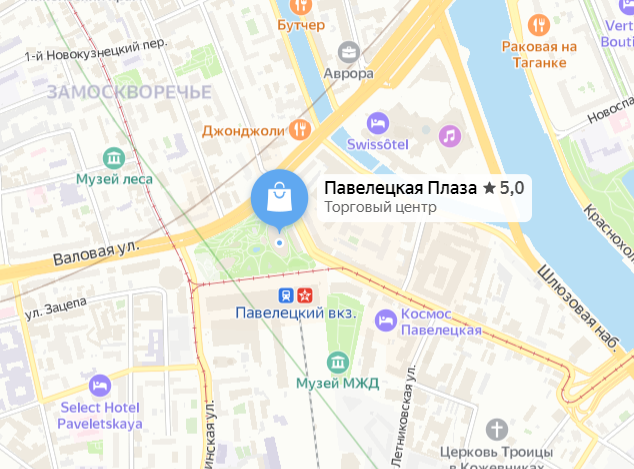

In [7]:
y0, x0 = [float(i) for i in input().split(',')]#55.730884, 37.638696

cnt = 0

def AddToRTreeMsk(x, y, b_type, b_name):
  global cnt
  mskRtree.insert(id = len(not_yes_buildings) + cnt, coordinates=(x, y, x, y), obj = [b_type, b_name])
  cnt += 1

AddToRTreeMsk(x0, y0, 'mall', 'Павлецкая плаза')

55.730884, 37.638696


In [8]:
# По умолчанию код ниже выводит ['train_station', 'Павелецкий вокзал']
# После вызова функции AddToRTree код выведет ['mall', 'Павелецкая плаза]!
def find_nearest_with_rtree(lati, longi):
  return [i.object for i in mskRtree.nearest((longi, lati, longi, lati), objects = True)][0]

print(find_nearest_with_rtree(55.730884, 37.638696))

['mall', 'Павлецкая плаза']


# 3. Вышка.Навигация - создаем дерево данных

Разработаем свою систему навигации в Атриуме! Дана карта Атриума:

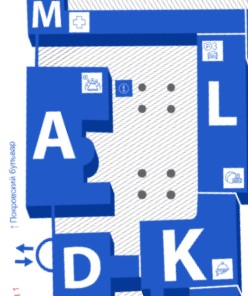

Задача: создать R-Tree, содержащее данные о корпусах M, L, K, D и A. Разработайте собственную систему координат. За нулевую координату (0, 0) можно принять левую нижнюю точку изображения. Объекты в R-Tree не должны иметь идеально точные координаты. Крыло A можно принять за прямоугольный объект.

In [9]:
atruimRtree = rtree.index.Index()

In [10]:
cnt = 0

def AddToRtreeAtruim(tuple_coord, obj_name):
  global cnt
  x0, y0, x1, y1 = tuple_coord
  atruimRtree.insert(id = cnt, coordinates=(x0, y0, x1, y1), obj = obj_name)
  cnt += 1

# Начало координатной плоскости (0, 0) - левая нижняя точка изображения
# Ниже дано описание ключевых точек, по которым строиться MBR для каждого из корпусов
# Ниже приложено фото с координатами соответсвующих точек
# D - {A(4, 0), B(8, 4)} , {C(8, 1), D(10, 2)}
# A - {alfa(2, 6), delta(8, 19)}
# K - {E(10, 0), F(18, 5)}, {G(16, 5), H(18, 7)}
# L - {K(16, 7), L(18, 21)}
# M - {Z(2, 21), W(5, 24)}, {X(5, 21), Y(18, 23)}

AddToRtreeAtruim((4, 0, 8, 4), 'D')
AddToRtreeAtruim((8, 1, 10, 2), 'D')
AddToRtreeAtruim((10, 0, 18, 5), 'K')
AddToRtreeAtruim((16, 5, 18, 7), 'K')
AddToRtreeAtruim((16, 7, 18, 21), 'L')
AddToRtreeAtruim((2, 21, 5, 24), 'M')
AddToRtreeAtruim((5, 21, 18, 23), 'M')
AddToRtreeAtruim((2, 6, 8, 19), 'A')

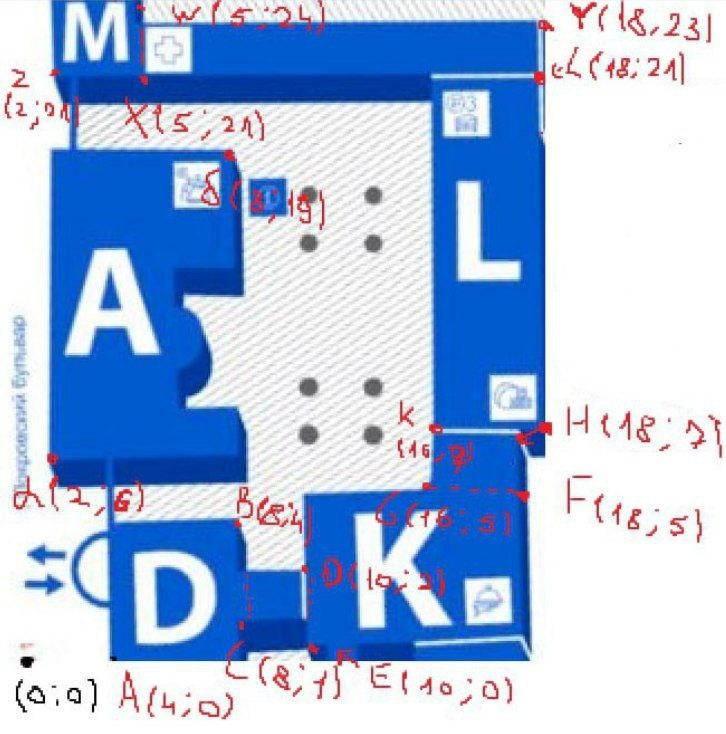

# 4. Вышка.Навигация - ищем первокурсника

Первокурсник Петя потерялся, помогите его найти! Программа получает на ввод координаты Пети (x, y). Нужно определить, в каком корпусе (M, L, K, D или A) он находится. Если Петя не в корпусе, нужно написать, какой копус к нему ближе всего. Используйте R-Tree, которое вы создали в предыдущем задании.

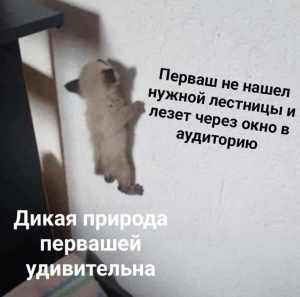

In [ ]:
x0, y0 = [float(i) for i in input().split(',')]

def FindPetya(x, y):
  lst_corpus = [i.object for i in atruimRtree.intersection((x, y, x, y), objects= True)]
  if len(lst_corpus) != 0:
    print(f"Петя находиться в корпусе {lst_corpus[0]}")
  else:
    lst_nearest = [i.object for i in atruimRtree.nearest((x, y, x, y), objects= True)]
    print(f"Петя не находиться в корпусе\nБлижайший к нему корпус - {lst_nearest[0]}")

FindPetya(x0, y0)

# 5. Банщики

После тяжелого учебного дня Петя решил отдохнуть и сходить с одногруппниками в баню. Загрузите данные о банях в R-Tree, чтобы помочь Пете найти ближайшую! Программа должна получить координаты Пети и вывести координаты подходящей бани.



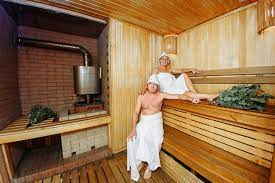

In [13]:
# @title Создание перменной хранящей информацию о банях в Москве, определение основных функций
sauna_buildings = mw_buildings[mw_buildings['BUILDING'] == 'sauna']

def get_banya_name(idx):
  name = [i for i in sauna_buildings.iloc[[idx]]["NAME"]][0]
  if name == None:
    return "Нет данных"
  return name

def get_banya_coords(idx):
  buildingGeom = [i for i in sauna_buildings.iloc[[idx]]["geometry"]]
  x, y = buildingGeom[0].exterior.coords.xy
  coords = numpy.dstack((x,y)).tolist()[0]
  western_point, eastern_point = coords[0], coords[-1]
  western_point = [min(western_point[0], eastern_point[0]), min(western_point[1], eastern_point[1])]
  eastern_point = [max(western_point[0], eastern_point[0]), max(western_point[1], eastern_point[1])]
  for i in range(1, len(coords) - 1):
    x, y = coords[i]
    western_point = [min(western_point[0], x), min(western_point[1], y)]
    eastern_point = [max(x, eastern_point[0]), max(y, eastern_point[1])]
  return [western_point, eastern_point]

def get_banya_strt(idx):
  strt = [i for i in sauna_buildings.iloc[[idx]]["A_STRT"]][0]
  if strt == None:
    return "Нет данных"
  return strt

def get_banya_strstnum(idx):
  num = [i for i in sauna_buildings.iloc[[idx]]["A_HSNMBR"]][0]
  if num == None:
    return "Нет данных"
  return num

In [14]:
# @title Создание R-tree для бань и добавление в него соответсвующей информации
banyaRtree = rtree.index.Index()

for i in range(len(sauna_buildings)):
  name = get_banya_name(i)
  strt = get_banya_strt(i)
  strtNum = get_banya_strstnum(i)
  wpoint, epoint = get_banya_coords(i)
  x0, y0 = wpoint
  x1, y1 = epoint
  banyaRtree.insert(id = i, coordinates=(x0, y0, x1, y1), obj = [name, strt, strtNum, wpoint, epoint])


In [15]:
# @title Ввод координат Пети и поиск ближайщей бани
yt, xt = [float(i) for i in input().split(',')]#широта и долгота

def find_nearest_banya(x, y):
  lst_nearest = [i.object for i in banyaRtree.nearest((x, y, x, y), objects = True)][0]
  nearest_name = lst_nearest[0]
  nearest_strt = lst_nearest[1]
  nearest_strt_num = lst_nearest[2]
  x0, y0 = lst_nearest[3][0], lst_nearest[3][1]
  x1, y1 = lst_nearest[4][0], lst_nearest[4][1]
  xf = abs(x1 - x0)/2 + x0
  yf = abs(y1- y0)/2 + y0
  print(f"Информация о ближайшей бане:\nКоординаты:{yf, xf}\nАдрес: {nearest_strt},{nearest_strt_num}\nНазвание: {nearest_name}")

find_nearest_banya(xt, yt)


55.730884, 37.638696
Информация о ближайшей бане:
Координаты:(55.6802901, 37.62342515)
Адрес: Варшавское шоссе,34
Название: Нет данных
